<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/main/CodeExamples%20/USconsumption_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
consumption_df = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv")
consumption_df.head()

,year,income,consumption,production,unemployment,savings
0,1970.00,1.026164,0.515488,-2.301594,-24.013389,-12.860000
1,1970.25,1.321423,0.667464,-0.971319,-25.716675,-12.707256
2,1970.50,1.165145,0.102766,-0.392985,-25.743479,-12.752851
3,1970.75,0.502112,-0.132854,-2.179090,-25.396463,-13.277377
4,1971.00,1.880158,1.563505,0.976772,-28.159259,-13.033525


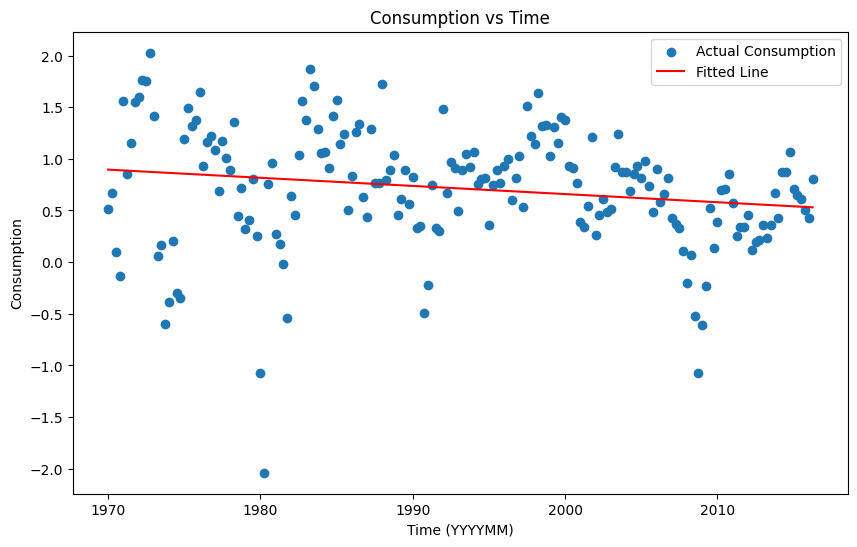

In [16]:
# prompt: fit a line to consumption vs time with sklearn and plot the result

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming consumption_df is already loaded as in the previous code
# consumption_df = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/consumptionUS.csv")

# Prepare the data
X = consumption_df['year'].values.reshape(-1, 1)  # Reshape for sklearn
y = consumption_df['consumption'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the consumption
y_pred = model.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Consumption')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Time (YYYYMM)')
plt.ylabel('Consumption')
plt.title('Consumption vs Time')
plt.legend()
plt.show()


In [ ]:
import sklearn as skl


In [3]:
# prompt: create a linear regression model with statsmodels to predict consumption (endogenous) from income (exogenous)

import statsmodels.api as sm

X = consumption_df['income']
y = consumption_df['consumption']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     49.35
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           4.02e-11
Time:                        19:02:55   Log-Likelihood:                -140.66
No. Observations:                 186   AIC:                             285.3
Df Residuals:                     184   BIC:                             291.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4787      0.051      9.464      0.0

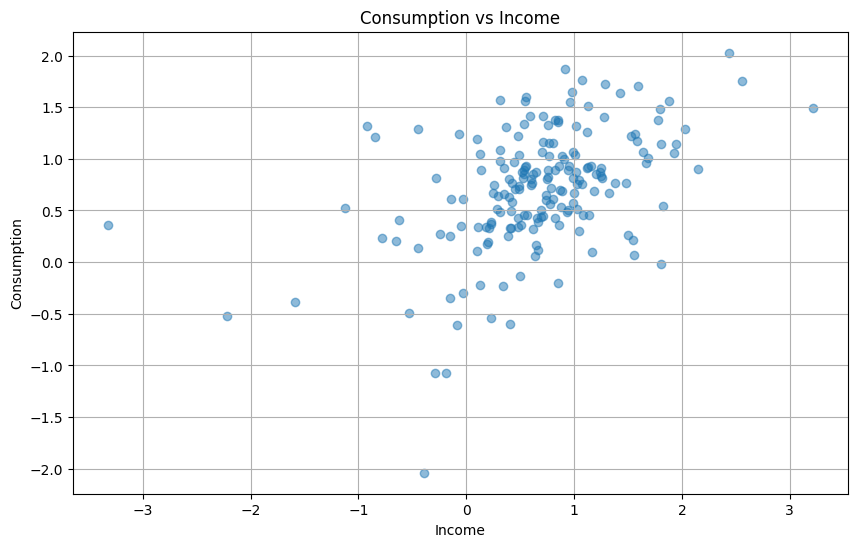

Correlation between Income and Consumption: 0.45987054061200766
                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     49.35
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           4.02e-11
Time:                        19:04:50   Log-Likelihood:                -140.66
No. Observations:                 186   AIC:                             285.3
Df Residuals:                     184   BIC:                             291.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [8]:
# prompt: plot consumption vs income and calculate the correlation

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


y = consumption_df['consumption']


# Plot consumption vs income
plt.figure(figsize=(10, 6))
plt.scatter(consumption_df['income'], consumption_df['consumption'], alpha=0.5)
plt.title('Consumption vs Income')
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.grid(True)
plt.show()

# Calculate and print the correlation
correlation = consumption_df['income'].corr(consumption_df['consumption'])
print(f"Correlation between Income and Consumption: {correlation}")


X = consumption_df['income']
y = consumption_df['consumption']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


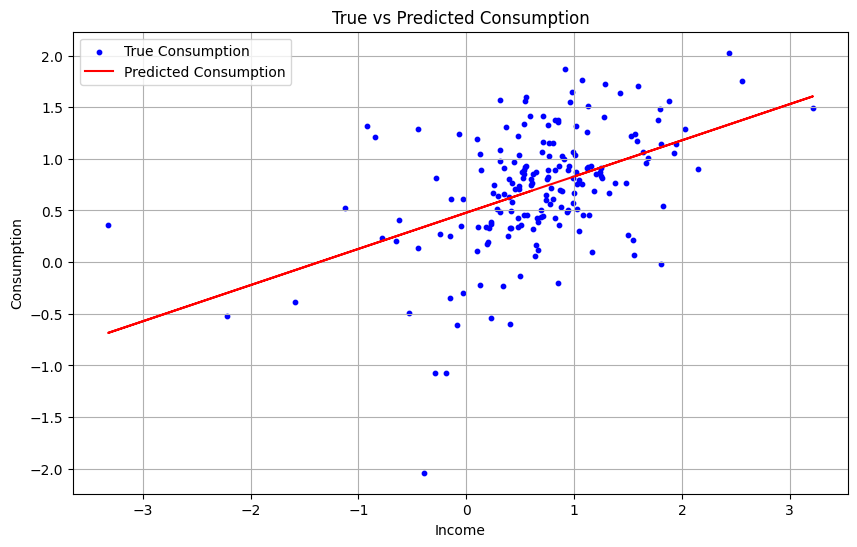

In [9]:
import matplotlib.pyplot as plt

predictions = results.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(consumption_df['income'], y, label='True Consumption', color='blue', s=10)
plt.plot(consumption_df['income'], predictions, label='Predicted Consumption', color='red')
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.title('True vs Predicted Consumption')
plt.legend()
plt.grid(True)
plt.show()


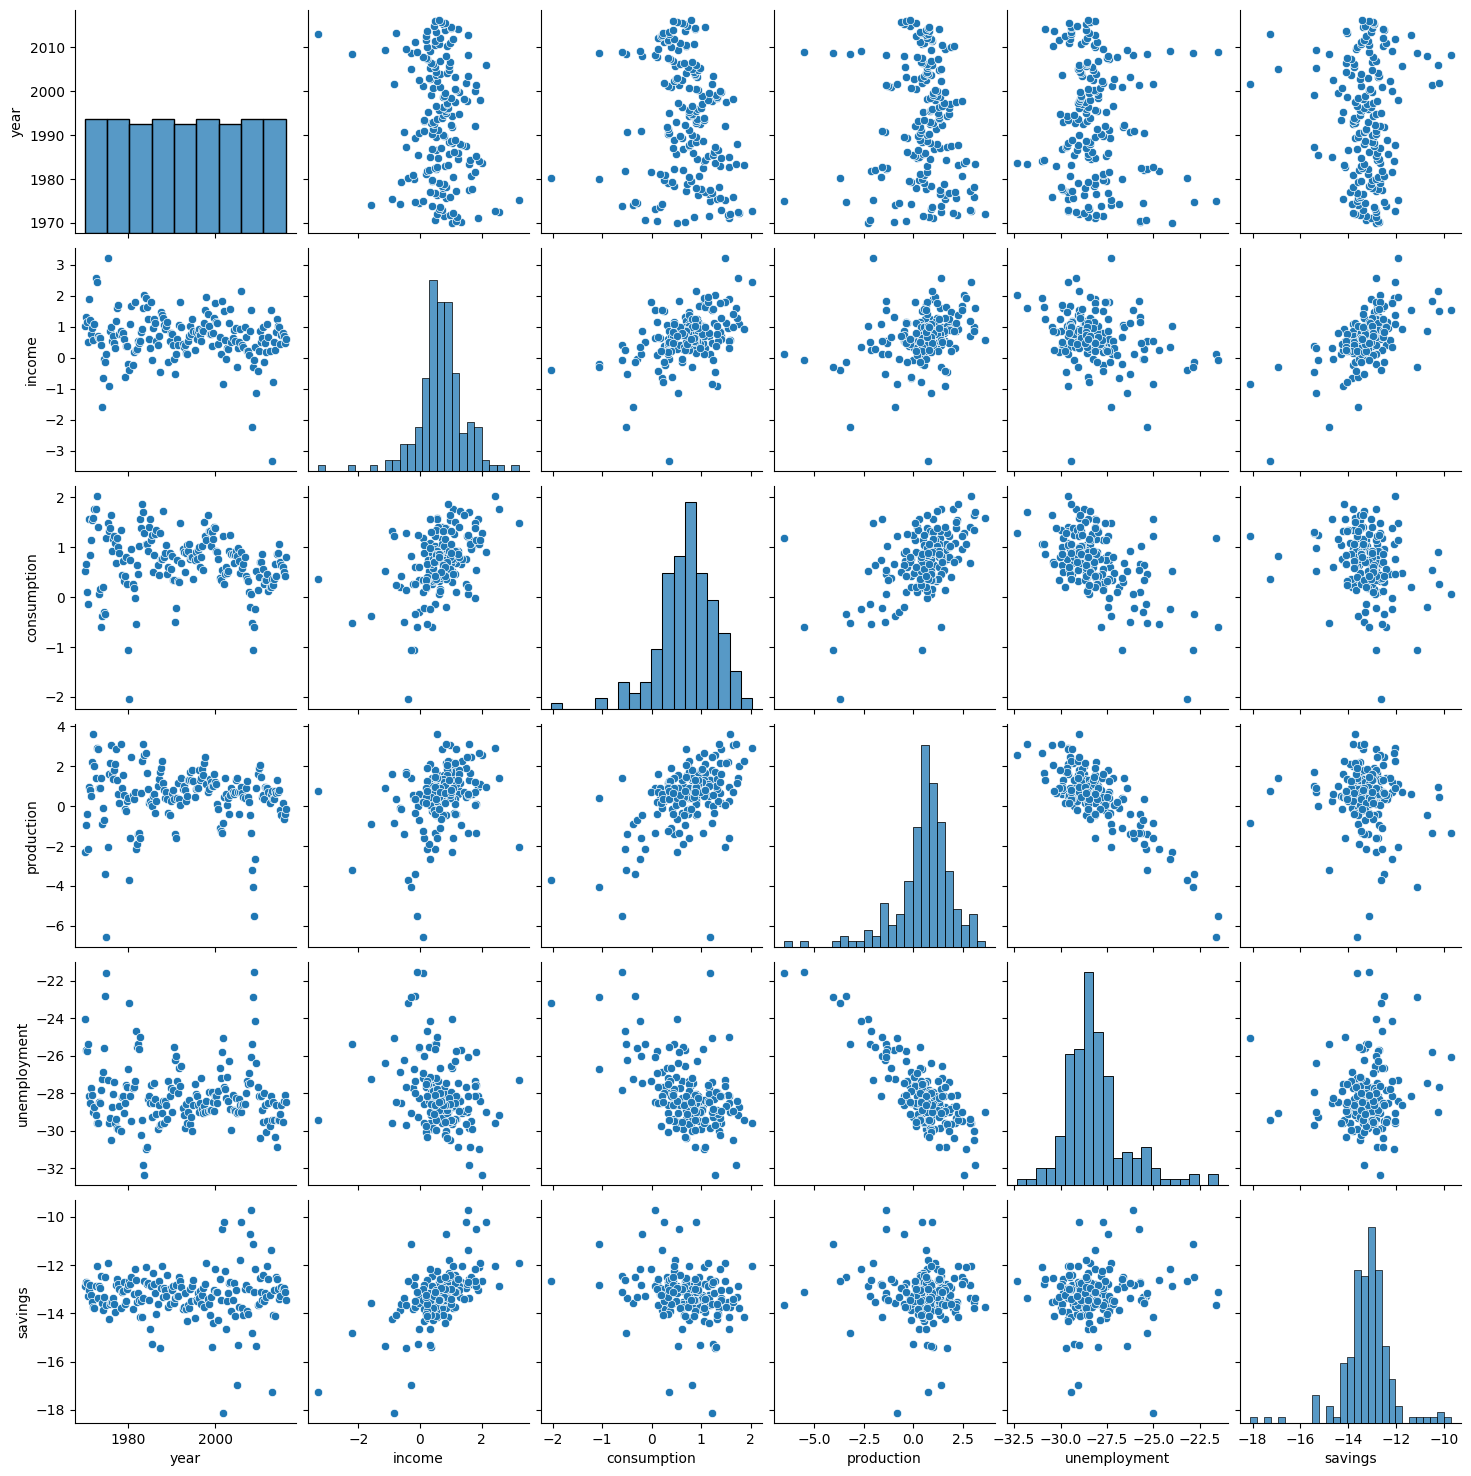

In [10]:
# prompt: make a pair plot of all variables in the consumption_df dataframe

import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(consumption_df)
plt.show()


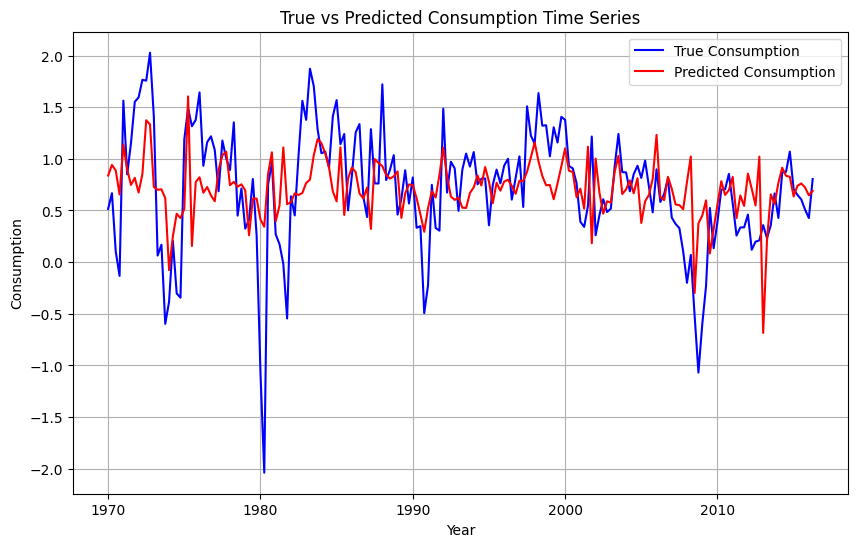

In [11]:
# prompt: plot the time series of true and predicted consumption

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(consumption_df['year'], y, label='True Consumption', color='blue')
plt.plot(consumption_df['year'], predictions, label='Predicted Consumption', color='red')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('True vs Predicted Consumption Time Series')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
consumption_df

,year,income,consumption,production,unemployment,savings
0,1970.00,1.026164,0.515488,-2.301594,-24.013389,-12.860000
1,1970.25,1.321423,0.667464,-0.971319,-25.716675,-12.707256
2,1970.50,1.165145,0.102766,-0.392985,-25.743479,-12.752851
3,1970.75,0.502112,-0.132854,-2.179090,-25.396463,-13.277377
4,1971.00,1.880158,1.563505,0.976772,-28.159259,-13.033525
...,...,...,...,...,...,...
181,2015.25,0.742163,0.651337,-0.464605,-28.634280,-12.920307
182,2015.50,0.808291,0.607343,0.128754,-29.523084,-12.973597
183,2015.75,0.697304,0.508611,-0.628269,-28.408732,-12.956514
184,2016.00,0.479744,0.427022,-0.382036,-28.118906,-13.123471


                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     96.18
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.01e-43
Time:                        19:05:04   Log-Likelihood:                -56.771
No. Observations:                 186   AIC:                             123.5
Df Residuals:                     181   BIC:                             139.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.7008      0.802     -8.357   

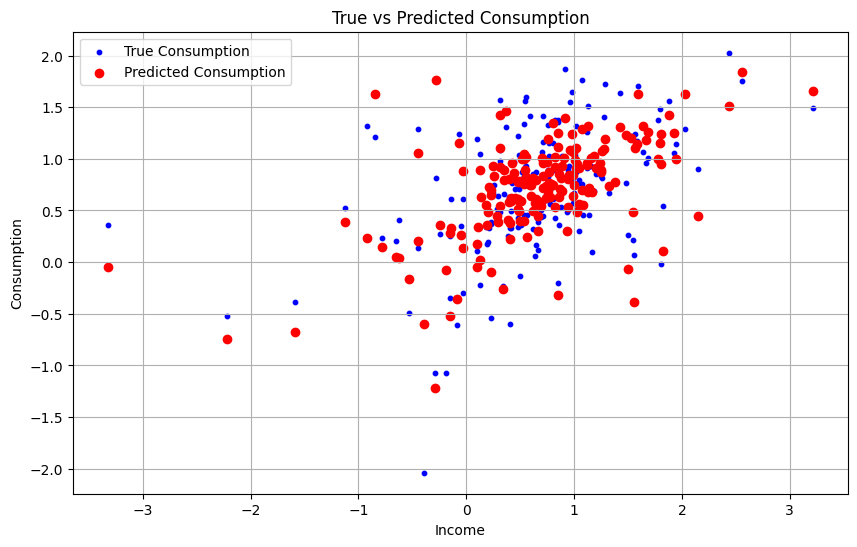

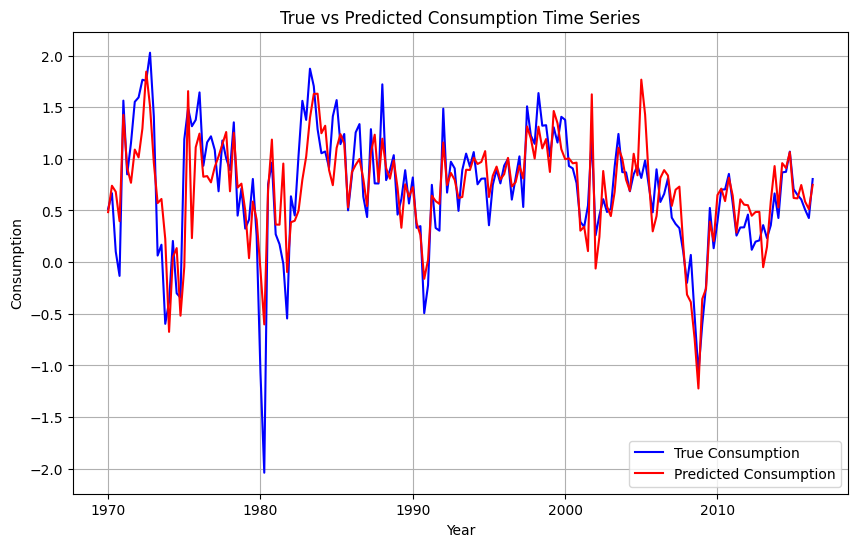

In [13]:
# prompt: create a multivariate regression model predicting consumption using unemployment income savings and production




# Define the independent variables (features)
X = consumption_df[['income', 'unemployment', 'savings', 'production']]
# Add a constant term for the intercept
X = sm.add_constant(X)
# Define the dependent variable (target)
y = consumption_df['consumption']
# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

# Generate predictions
predictions = results.predict(X)

# Create the scatter plot of true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(consumption_df['income'], y, label='True Consumption', color='blue', s=10)
plt.scatter(consumption_df['income'], predictions, label='Predicted Consumption', color='red')
plt.xlabel('Income')
plt.ylabel('Consumption')
plt.title('True vs Predicted Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Create the time series plot of true vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(consumption_df['year'], y, label='True Consumption', color='blue')
plt.plot(consumption_df['year'], predictions, label='Predicted Consumption', color='red')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('True vs Predicted Consumption Time Series')
plt.legend()
plt.grid(True)
plt.show()


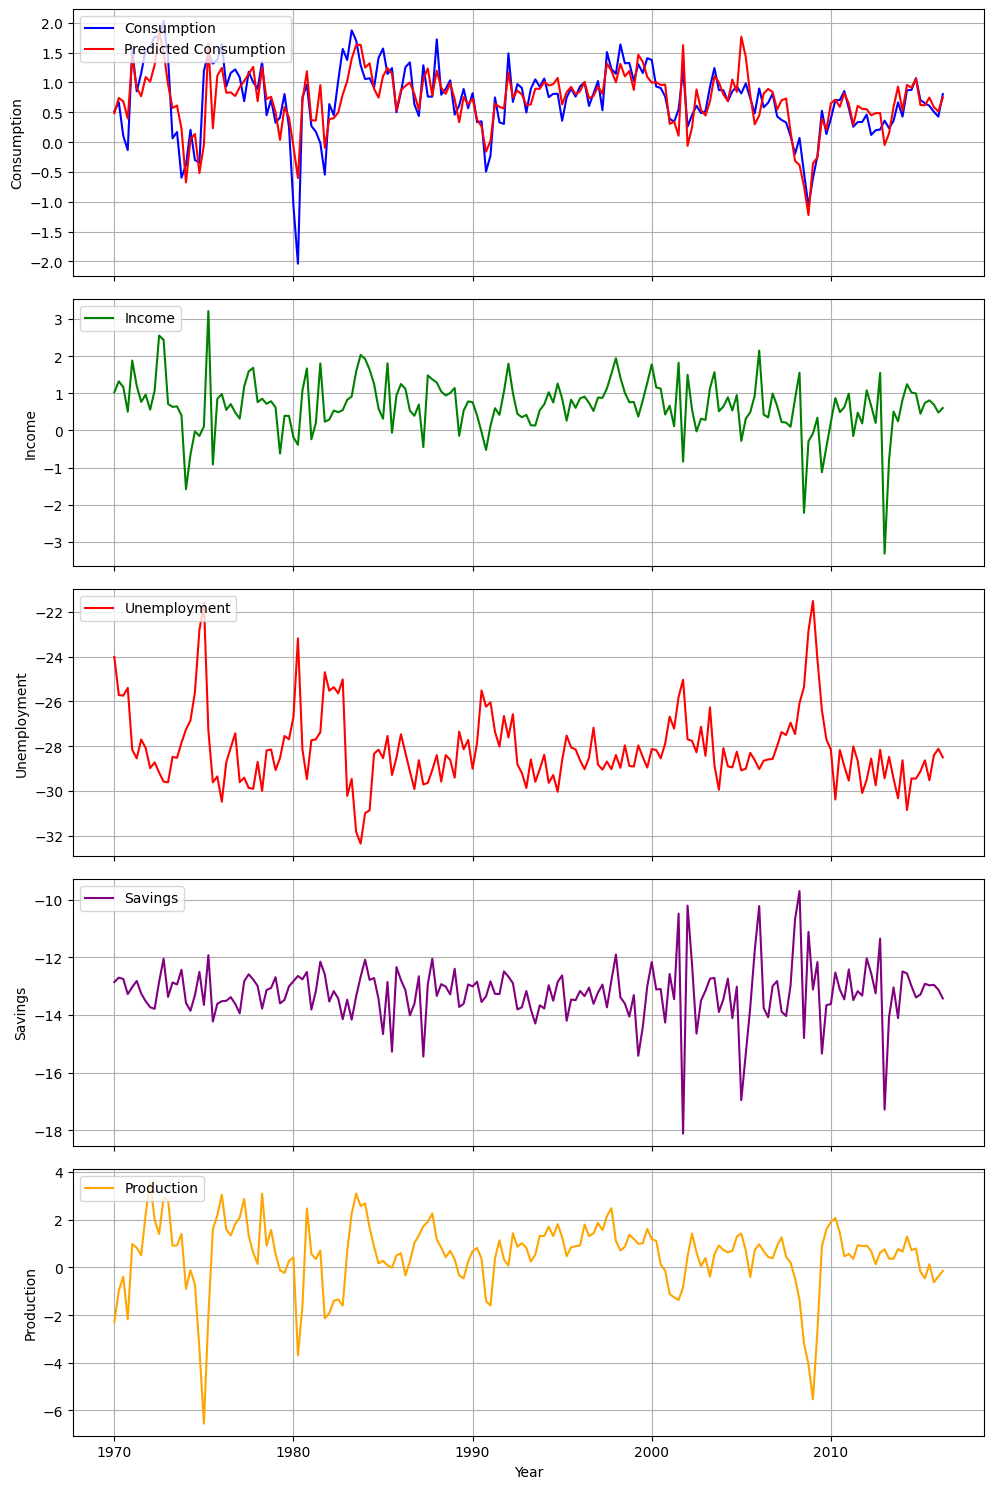

In [ ]:
# prompt: plot all endogenous and exogenous model variables against time in 5 panels one over the other

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Create the subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15), sharex=True)

# Plot each variable in a separate subplot
axes[0].plot(consumption_df['year'], consumption_df['consumption'], label='Consumption', color='blue')
axes[0].plot(consumption_df['year'], predictions, label='Predicted Consumption', color='red')
axes[0].set_ylabel('Consumption')
axes[0].legend(loc='upper left')
axes[0].grid(True)

axes[1].plot(consumption_df['year'], consumption_df['income'], label='Income', color='green')
axes[1].set_ylabel('Income')
axes[1].legend(loc='upper left')
axes[1].grid(True)


axes[2].plot(consumption_df['year'], consumption_df['unemployment'], label='Unemployment', color='red')
axes[2].set_ylabel('Unemployment')
axes[2].legend(loc='upper left')
axes[2].grid(True)


axes[3].plot(consumption_df['year'], consumption_df['savings'], label='Savings', color='purple')
axes[3].set_ylabel('Savings')
axes[3].legend(loc='upper left')
axes[3].grid(True)

axes[4].plot(consumption_df['year'], consumption_df['production'], label='Production', color='orange')
axes[4].set_xlabel('Year')
axes[4].set_ylabel('Production')
axes[4].legend(loc='upper left')
axes[4].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


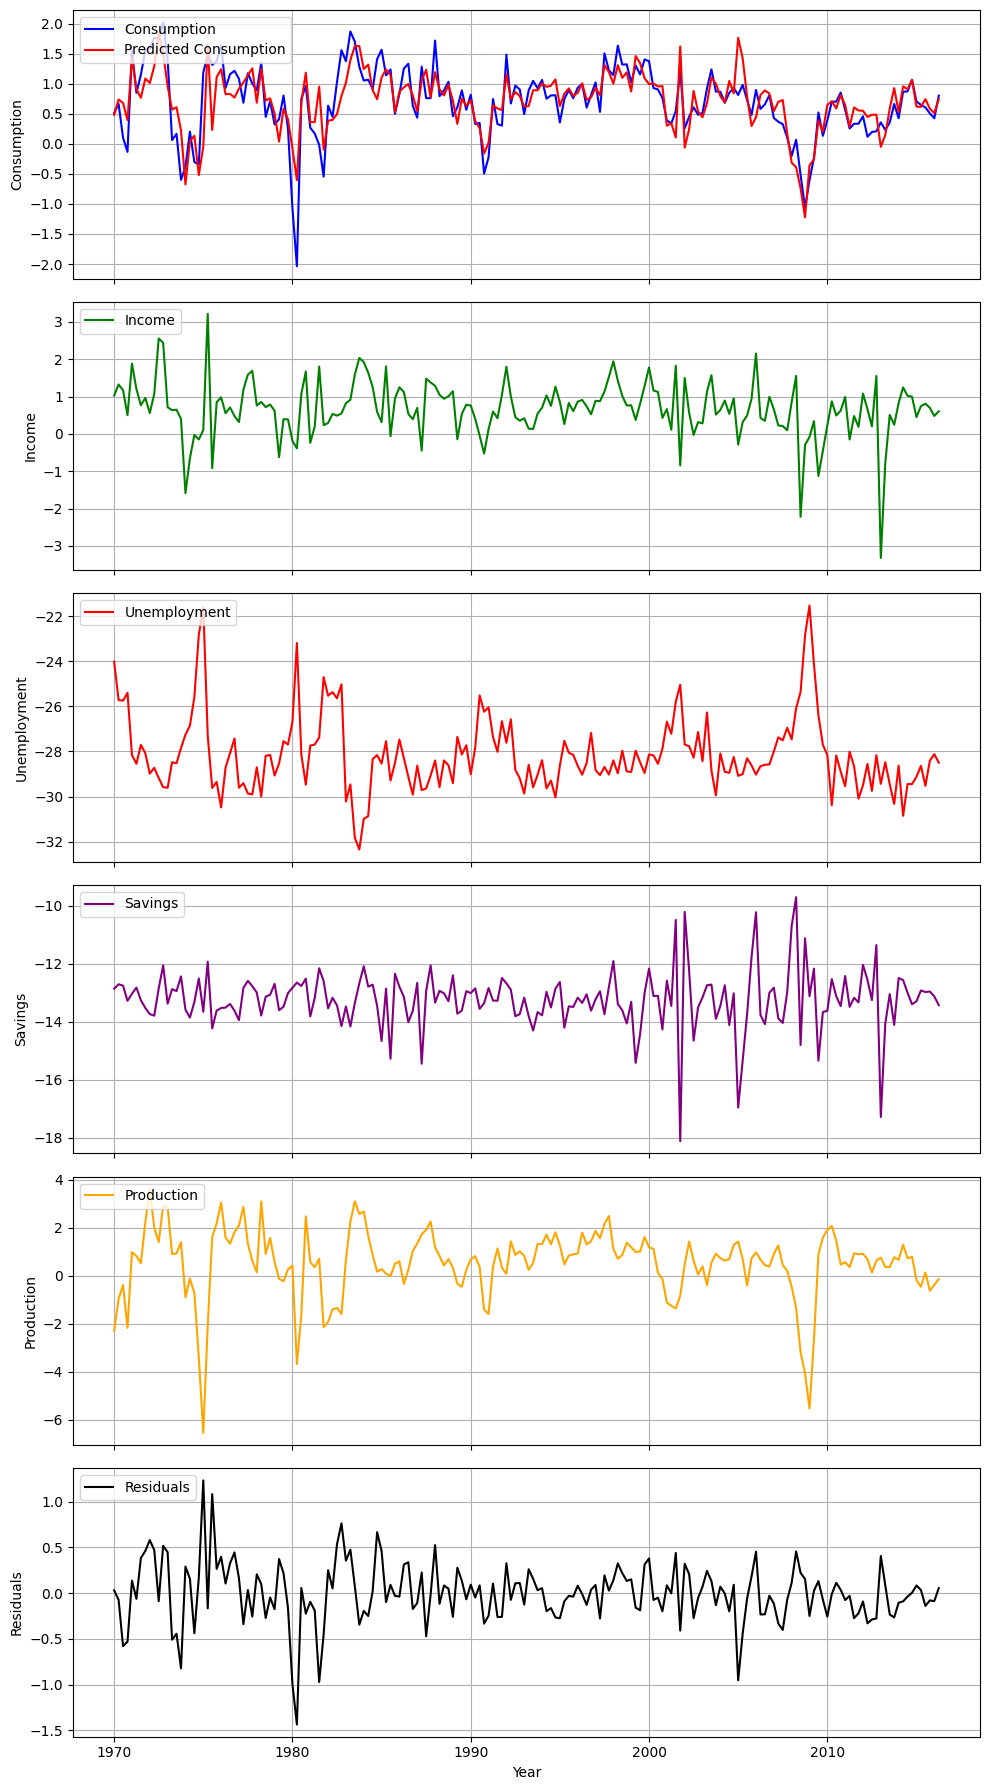

In [ ]:
# prompt: plot all endogenous and exogenous model variables against time in 5 panels one over the other include the model predicion in th exogenous variable planel and add the residuals plot at the bottom


residuals = y - predictions

# Create the subplots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 18), sharex=True)

# Plot each variable in a separate subplot
axes[0].plot(consumption_df['year'], consumption_df['consumption'], label='Consumption', color='blue')
axes[0].plot(consumption_df['year'], predictions, label='Predicted Consumption', color='red')
axes[0].set_ylabel('Consumption')
axes[0].legend(loc='upper left')
axes[0].grid(True)

axes[1].plot(consumption_df['year'], consumption_df['income'], label='Income', color='green')
axes[1].set_ylabel('Income')
axes[1].legend(loc='upper left')
axes[1].grid(True)

axes[2].plot(consumption_df['year'], consumption_df['unemployment'], label='Unemployment', color='red')
axes[2].set_ylabel('Unemployment')
axes[2].legend(loc='upper left')
axes[2].grid(True)

axes[3].plot(consumption_df['year'], consumption_df['savings'], label='Savings', color='purple')
axes[3].set_ylabel('Savings')
axes[3].legend(loc='upper left')
axes[3].grid(True)

axes[4].plot(consumption_df['year'], consumption_df['production'], label='Production', color='orange')
axes[4].set_ylabel('Production')
axes[4].legend(loc='upper left')
axes[4].grid(True)

axes[5].plot(consumption_df['year'], residuals, label='Residuals', color='black')
axes[5].set_xlabel('Year')
axes[5].set_ylabel('Residuals')
axes[5].legend(loc='upper left')
axes[5].grid(True)


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
